<a href="https://colab.research.google.com/github/tvml/ml2324/blob/master/codici/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Naive Bayes text classifier

In [ ]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09',
         '#c79fef', '#80f9ad']

In [4]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml2324/dataset/"

def get_file(filename):
    IS_COLAB = ('google.colab' in str(get_ipython()))
    if IS_COLAB:
        urllib.request.urlretrieve (url+filename, filename)
        return filename
    else:
        return filepath+filename


Legge il dataset

In [5]:
data = io.loadmat(get_file('XwindowsDocData.mat'))

xtrain = data['xtrain']
ytrain = data['ytrain']

ndocs = xtrain.shape[0] 
nterms = xtrain.shape[1]
classes = np.unique(ytrain)
nclasses = classes.shape[0]

In [6]:
print(f'{nterms} termini')
print(f'{ndocs} documenti')

600 termini
900 documenti


In [21]:
vocab = np.array([x[0][0] for x in data['vocab']])

In [17]:
#f = lambda x: x[0]
#vocab = np.array(list(map(f, data['vocab'][:,0])))

In [22]:
vocab

array(['straight', 'magazines', 'issues', 'ray', 'enabled', 'head',
       'improved', 'thread', 'libs', 'working', 'presented', 'exactly',
       'downloaded', 'hoping', 'described', 'difficult',
       'wclriscspsmotcom', 'remember', 'company', 'icons', 'hundred',
       'knowing', 'apart', 'found', 'closed', 'acceptable',
       'customization', 'server', 'interfaces', 'suggest', 'became',
       'native', 'population', 'lest', 'teach', 'quickly', 'windowsbased',
       'boot', 'named', 'forget', 'neat', 'iii', 'replacing', 'aerospace',
       'dragging', 'change', 'fancy', 'viewer', 'computer', 'reserved',
       'static', 'robert', 'almost', 'doubt', 'eventually', 'only',
       'body', 'vital', 'customers', 'desperately', 'corp', 'move',
       'chances', 'commands', 'lot', 'additional', 'under', 'compilers',
       'engineering', 'advocate', 'internet', 'come', 'solaris', 'dale',
       'necessary', 'requirements', 'microsoft', 'highquality',
       'introduced', 'purchased', 'm

In [36]:
doc_id = 18
doc = [t_index for t_index in range(nterms) if xtrain[doc_id, t_index]==1]
print(f'Documento {doc_id}: {len(doc)} termini diversi, {len(doc)/nterms*100:5.2f}% di tutto il vocabolario')
print(f'Id dei termini: {doc}')
print(f'Termini: {[vocab[t] for t in doc]}')

Documento 18: 11 termini diversi,  1.83% di tutto il vocabolario
Id dei termini: [23, 106, 122, 205, 225, 279, 316, 408, 444, 514, 532]
Termini: ['found', 'subject', 'string', 'michael', 'this', 'libraries', 'article', 'were', 'with', 'reply', 'standard']


Crea un classificatore Naive-Bayes ed effettua il learning sul dataset

In [37]:
clf = MultinomialNB(alpha=1.0e-9)
clf.fit(xtrain, ytrain.ravel())

MultinomialNB(alpha=1e-09)

Deriva probabilità a priori delle classi $p(C_i)$

In [110]:
prior=np.exp(clf.class_log_prior_)
print(f'p(C_0)={round(prior[0],3)}, p(C_1)={round(prior[1],3)}')

p(C_0)=0.5, p(C_1)=0.5


Deriva probabilità dei termini date le classi (likelihood) $p(t_j|C_i)$

In [48]:
likelihood=np.exp(clf.feature_log_prob_)
likelihood.shape

(2, 600)

In [49]:
likelihood[:,:10]

array([[1.67448091e-04, 1.67448091e-13, 3.34896182e-04, 1.67448091e-04,
        3.34896182e-04, 1.67448091e-04, 1.67448091e-13, 6.69792364e-04,
        8.37240456e-04, 4.52109846e-03],
       [6.09013398e-04, 6.09013398e-04, 6.09013398e-04, 1.52253350e-13,
        1.52253350e-04, 1.06577345e-03, 1.52253350e-04, 1.21802680e-03,
        1.52253350e-13, 4.87210719e-03]])

Deriva probabilità a priori dei termini (evidenza) $p(t_j)=p(t_j|C_1)p(C_1)+p(t_j|C_2)p(C_2)$

In [51]:
evidence=np.array([likelihood[0,i]*prior[0]+likelihood[1,i]*prior[1] for i in range(nterms)])
evidence.shape[0]

600

In [52]:
evidence[:10]

array([3.88230745e-04, 3.04506699e-04, 4.71954790e-04, 8.37240457e-05,
       2.43574766e-04, 6.16610769e-04, 7.61266749e-05, 9.43909581e-04,
       4.18620228e-04, 4.69660282e-03])

Applica la regola di Bayes per calcolare le probabilità a posteriori delle classi data l'occorrenza dei termini

$$p(C_k|t_j)=\frac{p(t_j|C_k)p(C_k)}{p(t_j)}$$

In [ ]:
posterior = np.zeros([likelihood.shape[0],likelihood.shape[1]])
for i in range(likelihood.shape[0]):
    for j in range(likelihood.shape[1]):
        posterior[i,j] = likelihood[i,j]*prior[i]/evidence[j]

In [72]:
posterior.shape

(2, 600)

Applica la regola di Bayes per calcolare le probabilità a posteriori delle classi data la non occorrenza dei termini

$$p(C_k|\lnot t_j)=\frac{p(\lnot t_j|C_k)p(C_k)}{p(\lnot t_j)}=\frac{(1-p(t_j|C_k))p(C_k)}{1-p(t_j)}$$

In [91]:
posterior_n = np.zeros([likelihood.shape[0],likelihood.shape[1]])
for i in range(likelihood.shape[0]):
    for j in range(likelihood.shape[1]):
        posterior_n[i,j] = (1-likelihood[i,j])*prior[i]/(1-evidence[j])

In [111]:
k= 10
print(f'Log probabilità dei primi {k} termini\n {vocab[:k]}')
print(f'Evidenza: \n{np.log(evidence[:k])}')
print(f'Condizionata alla classe 0: \n{np.log(likelihood[0,:k])}')
print(f'Condizionata alla classe 1: \n{np.log(likelihood[1,:k])}')
print(f"Della classe 0 a posteriori dell'occorrenza del termine: \n{np.log(posterior[0,:k])}")
print(f"Della classe 1 a posteriori dell'occorrenza del termine: \n{np.log(posterior[0,:k])}")
print(f"Log odds per l'occorrenza del termine: \n{np.log(posterior[1,:k]/posterior[0,:k])}")
print(f"Classe predetta in caso di occorrenza: {[1 if np.log(posterior[1,i])-np.log(posterior[0,i])>0 else 0 for i in range(k)]}")
print(f"Della classe 0 a posteriori della non occorrenza del termine: \n{np.log(posterior_n[0,:k])}")
print(f"Della classe 1 a posteriori della non occorrenza del termine: \n{np.log(posterior_n[0,:k])}")
print(f'Log odds per la non occorrenza del termine: \n{np.log(posterior_n[1,:k]/posterior_n[0,:k])}')
print(f"Classe predetta in caso di non occorrenza: {[1 if np.log(posterior_n[1,i])-np.log(posterior_n[0,i])>0 else 0 for i in range(k)]}")


Log probabilità dei primi 10 termini
 ['straight' 'magazines' 'issues' 'ray' 'enabled' 'head' 'improved'
 'thread' 'libs' 'working']
Evidenza: 
[-7.85391069 -8.09681747 -7.65862736 -9.38798434 -8.32008662 -7.39127258
 -9.48311183 -6.96548018 -7.77854643 -5.36091584]
Condizionata alla classe 0: 
[ -8.69483716 -29.418103    -8.00168998  -8.69483716  -8.00168998
  -8.69483716 -29.418103    -7.3085428   -7.08539925  -5.39900029]
Condizionata alla classe 1: 
[ -7.40367029  -7.40367029  -7.40367029 -29.51323049  -8.78996465
  -6.8440545   -8.78996465  -6.71052311 -29.51323049  -5.32422875]
Della classe 0 a posteriori dell'occorrenza del termine: 
[-1.53407365e+00 -2.20144327e+01 -1.03620980e+00 -9.09257003e-10
 -3.74750543e-01 -1.99671176e+00 -2.06281383e+01 -1.03620980e+00
 -1.81851312e-10 -7.31231638e-01]
Della classe 1 a posteriori dell'occorrenza del termine: 
[-1.53407365e+00 -2.20144327e+01 -1.03620980e+00 -9.09257003e-10
 -3.74750543e-01 -1.99671176e+00 -2.06281383e+01 -1.03620980e+00

In [112]:
term_id = 21
print(f"{term_id}: '{vocab[term_id]}'")
print(f"log(p('{vocab[term_id]}')))={np.log(evidence[term_id]):4.12f}")
print(f"log(p('{vocab[term_id]}'|C0)))={np.log(likelihood[0,term_id]):4.12f}")
print(f"log(p('{vocab[term_id]}'|C1)))={np.log(likelihood[1,term_id]):4.12f}")
print(f"log(p(C0|'{vocab[term_id]}')))={np.log(posterior[0,term_id]):4.12f}")
print(f"log(p(C1|'{vocab[term_id]}')))={np.log(posterior[1,term_id]):4.12f}")
print(f"Log odds occorrenza: log(p(C1|'{vocab[term_id]}')))-log(p(C0|'{vocab[term_id]}')))={np.log(posterior[1,term_id])-np.log(posterior[0,term_id]):4.12f}")
print(f"Classe predetta se occorrenza: C{1 if np.log(posterior[1,term_id])-np.log(posterior[0,term_id])>0 else 0}")
print(f"log(p(C0|not '{vocab[term_id]}')))={np.log(posterior_n[0,term_id]):4.12f}")
print(f"log(p(C1|not '{vocab[term_id]}')))={np.log(posterior_n[1,term_id]):4.12f}")
print(f"Log odds non occorrenza: log(p(C1|not '{vocab[term_id]}')))-log(p(C0|not '{vocab[term_id]}')))={np.log(posterior_n[1,term_id])-np.log(posterior_n[0,term_id]):4.12f}")
print(f"Classe predetta se non occorrenza: C{1 if np.log(posterior_n[1,term_id])-np.log(posterior_n[0,term_id])>0 else 0}")


21: 'knowing'
log(p('knowing')))=-7.319950492979
log(p('knowing'|C0)))=-6.748927009561
log(p('knowing'|C1)))=-8.789964650224
log(p(C0|'knowing')))=-0.122123697142
log(p(C1|'knowing')))=-2.163161337804
Log odds occorrenza: log(p(C1|'knowing')))-log(p(C0|'knowing')))=-2.041037640662
Classe predetta se occorrenza: C0
log(p(C0|not 'knowing')))=-0.693657590345
log(p(C1|not 'knowing')))=-0.692637031160
Log odds non occorrenza: log(p(C1|not 'knowing')))-log(p(C0|not 'knowing')))=0.001020559186
Classe predetta se non occorrenza: C1


Plot del modello generale di linguaggio, per l'unione delle due classi

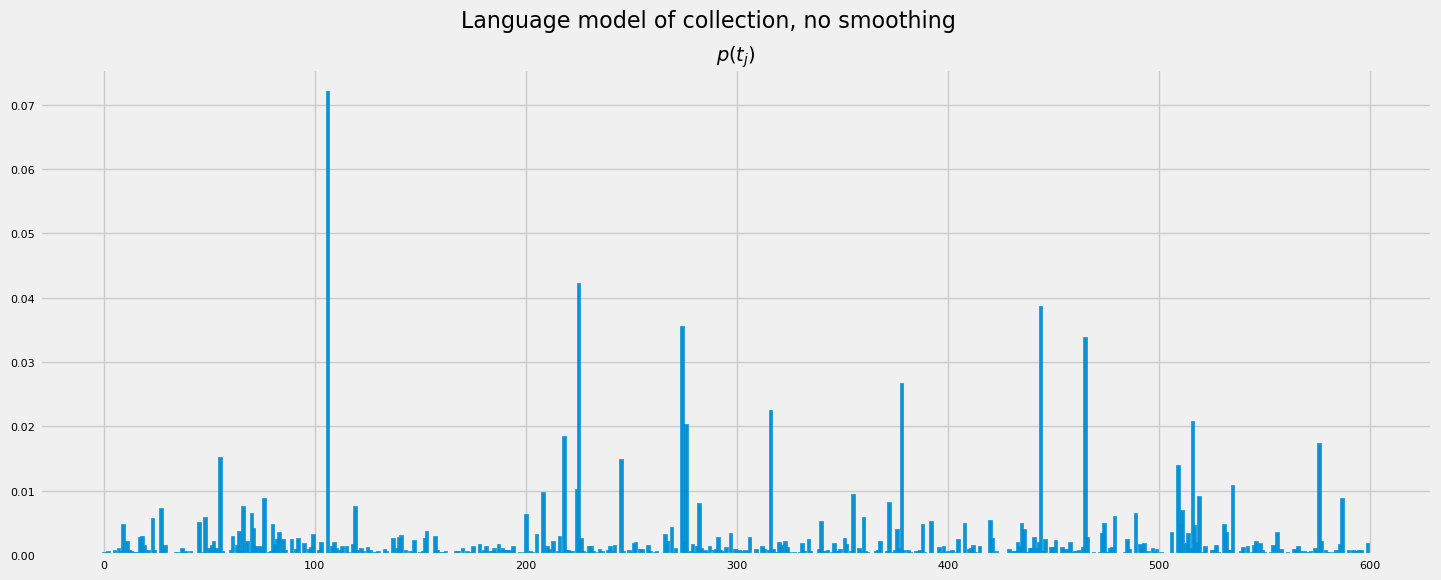

In [113]:
fig=plt.figure(figsize=(16,6))
ax=plt.subplot(1,1,1)
ax.bar(range(clf.feature_count_.shape[1]), evidence,  facecolor=colors[0], alpha=0.9, edgecolor=colors[0], lw=2)
plt.title('$p(t_j)$', fontsize=14)
plt.suptitle('Language model of collection, no smoothing ', fontsize=16)
plt.show()

Plot del modello di linguaggio risultante per le due classi

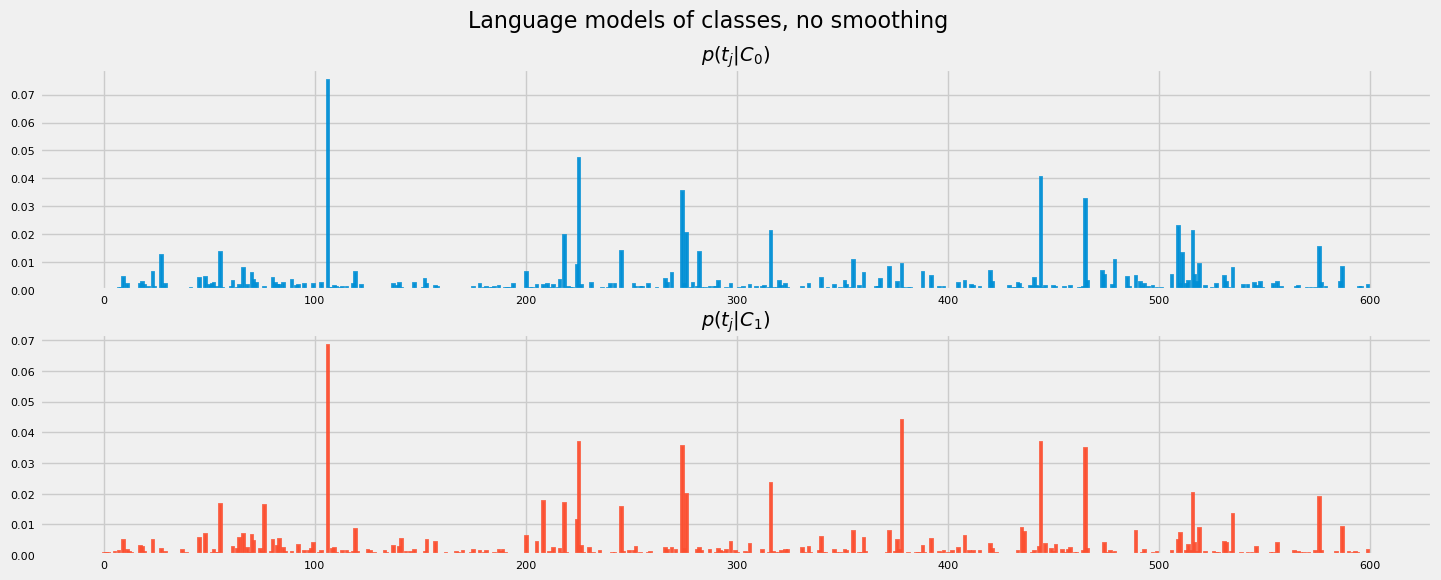

In [115]:
fig=plt.figure(figsize=(16,6))
for i,c in enumerate(classes):
    ax=plt.subplot(nclasses,1,i+1)
    ax.bar(range(clf.feature_count_.shape[1]), likelihood[i,:],  facecolor=colors[i], alpha=0.9, edgecolor=colors[i], lw=2)
    plt.title(f'$p(t_j|C_{i})$', fontsize=14)
plt.suptitle('Language models of classes, no smoothing ', fontsize=16)
plt.show()

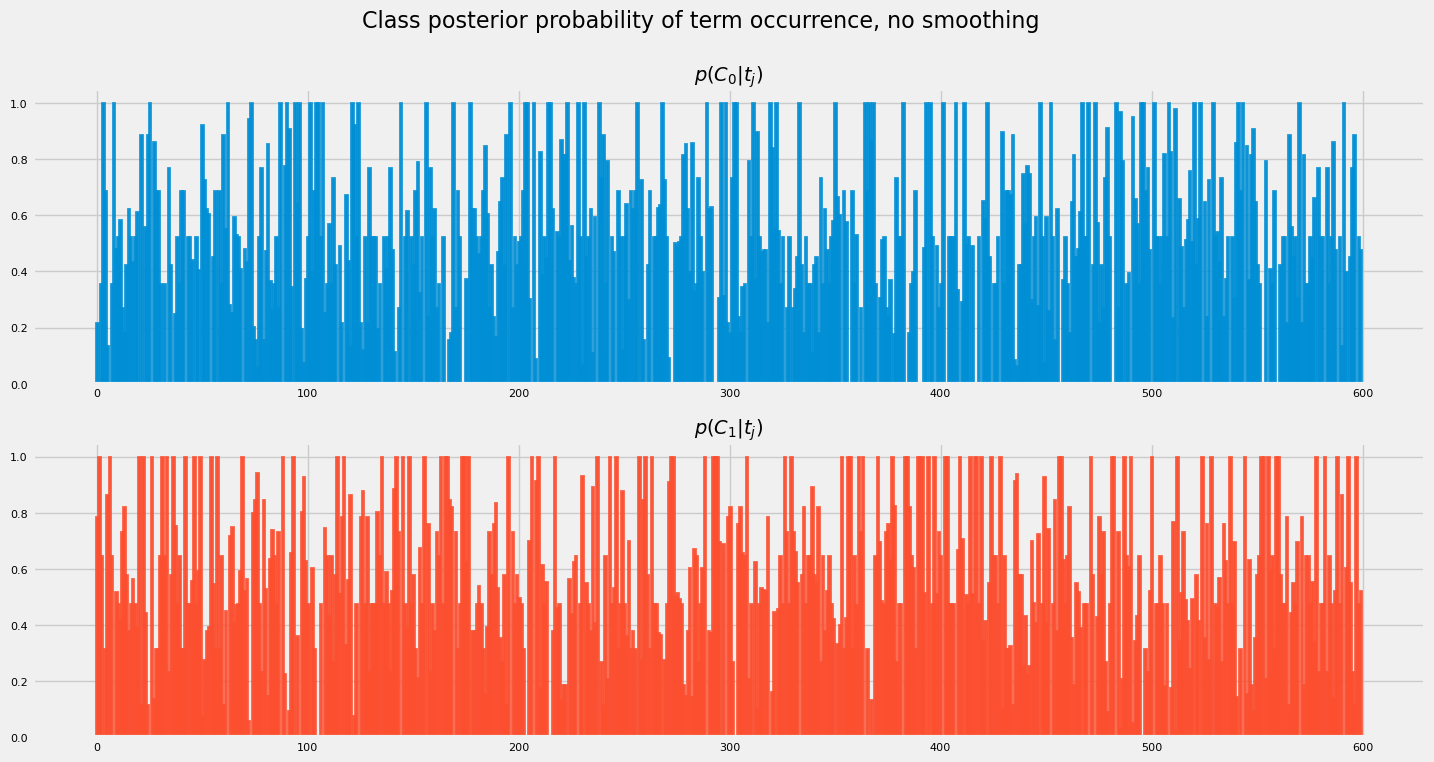

In [116]:
fig=plt.figure(figsize=(16,8))
for i,c in enumerate(classes):
    ax=plt.subplot(nclasses,1,i+1)
    ax.bar(range(clf.feature_count_.shape[1]), posterior[i,:],  facecolor=colors[i], alpha=0.9, edgecolor=colors[i], lw=2)
    plt.title(f'$p(C_{i}|t_j)$', fontsize=14)
plt.suptitle('Class posterior probability of term occurrence, no smoothing ', fontsize=16)
plt.show()

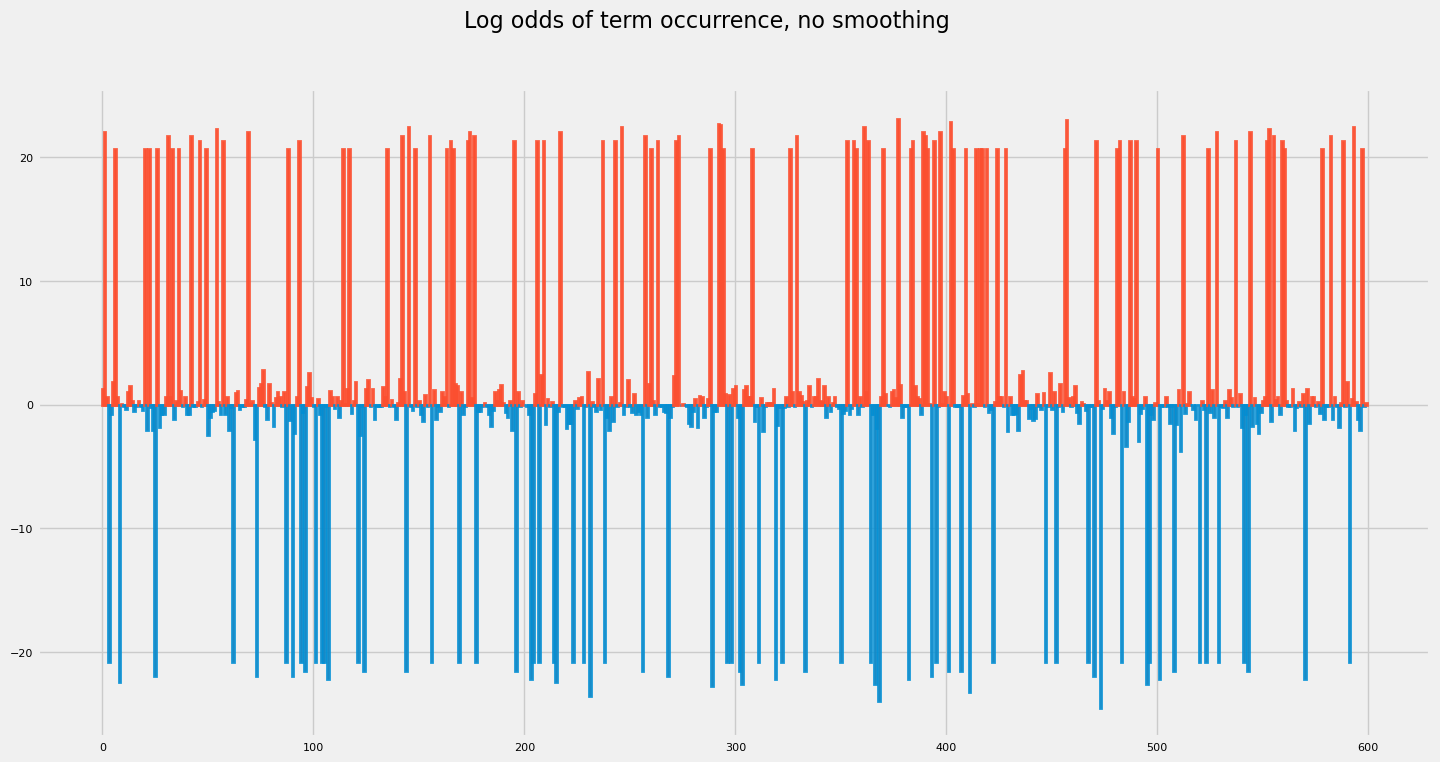

In [123]:
fig=plt.figure(figsize=(16,8))
plt.bar(range(nterms), np.log(posterior[1,:])-np.log(posterior[0,:]),  facecolor=colors[i], alpha=0.9, edgecolor=[colors[1] if posterior[1,j]>posterior[0,j] else colors[0] for j in range(nterms)], lw=2)
plt.suptitle('Log odds of term occurrence, no smoothing ', fontsize=16)
plt.show()

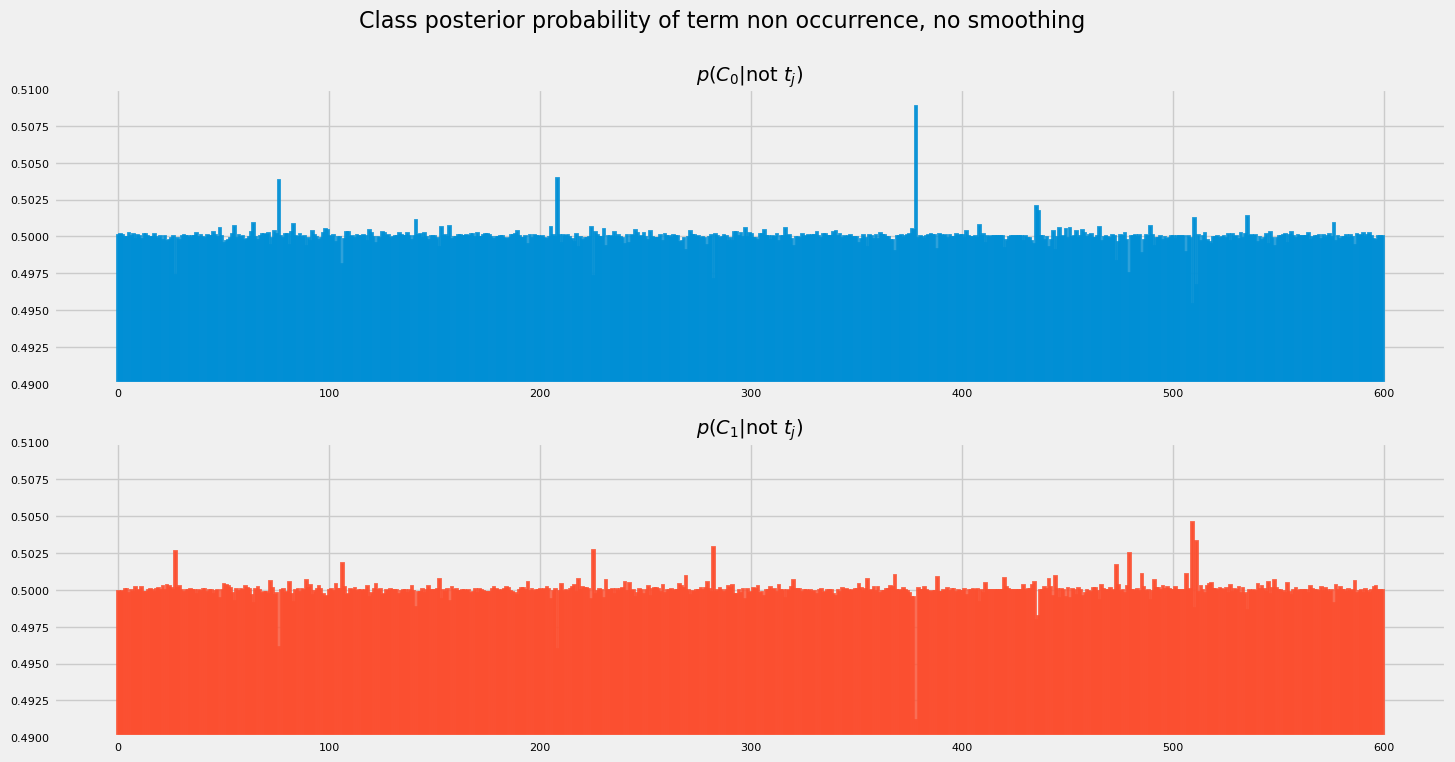

In [122]:
fig=plt.figure(figsize=(16,8))
for i,c in enumerate(classes):
    ax=plt.subplot(nclasses,1,i+1)
    ax.bar(range(clf.feature_count_.shape[1]), posterior_n[i,:],  facecolor=colors[i], alpha=0.9, edgecolor=colors[i], lw=2)
    plt.ylim([0.49,0.51])
    plt.title(f'$p(C_{i}|$not $ t_j)$', fontsize=14)
plt.suptitle('Class posterior probability of term non occurrence, no smoothing ', fontsize=16)
plt.show()

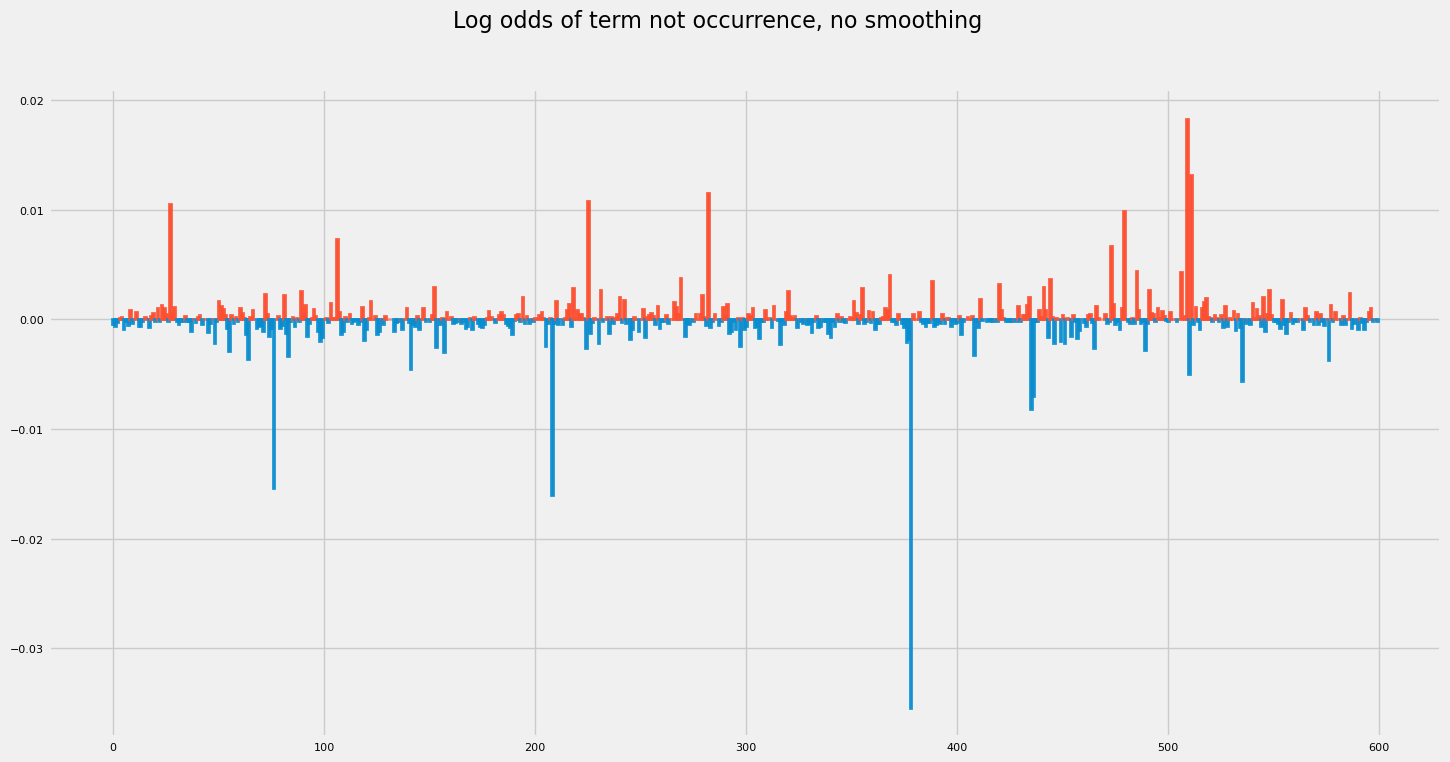

In [124]:
fig=plt.figure(figsize=(16,8))
plt.bar(range(nterms), np.log(posterior_n[1,:])-np.log(posterior_n[0,:]),  facecolor=colors[i], alpha=0.9, edgecolor=[colors[1] if posterior_n[1,j]>posterior_n[0,j] else colors[0] for j in range(nterms)], lw=2)
plt.suptitle('Log odds of term not occurrence, no smoothing ', fontsize=16)
plt.show()

Applicazione del classificatore al training set e derivazione della accuracy

In [125]:
preds = clf.predict(xtrain)
print(f'Accuracy = {accuracy_score(ytrain, preds):8.7f}')

Accuracy = 0.9211111


Istanza classificatore Naive-Bayes con Dirichlet smoothing simmetrico, con iperparametro $\alpha$ ed effettua il learning sul dataset

In [126]:
α = 50
clf1 = MultinomialNB(alpha=α)
clf1.fit(xtrain, ytrain.ravel())

MultinomialNB(alpha=50)

Deriva probabilità a posteriori delle feature (termini) $p(t_j|C_i)$

In [127]:
pf1=np.exp(clf1.feature_log_prob_)

Plot del modello di linguaggio risultante per le due classi

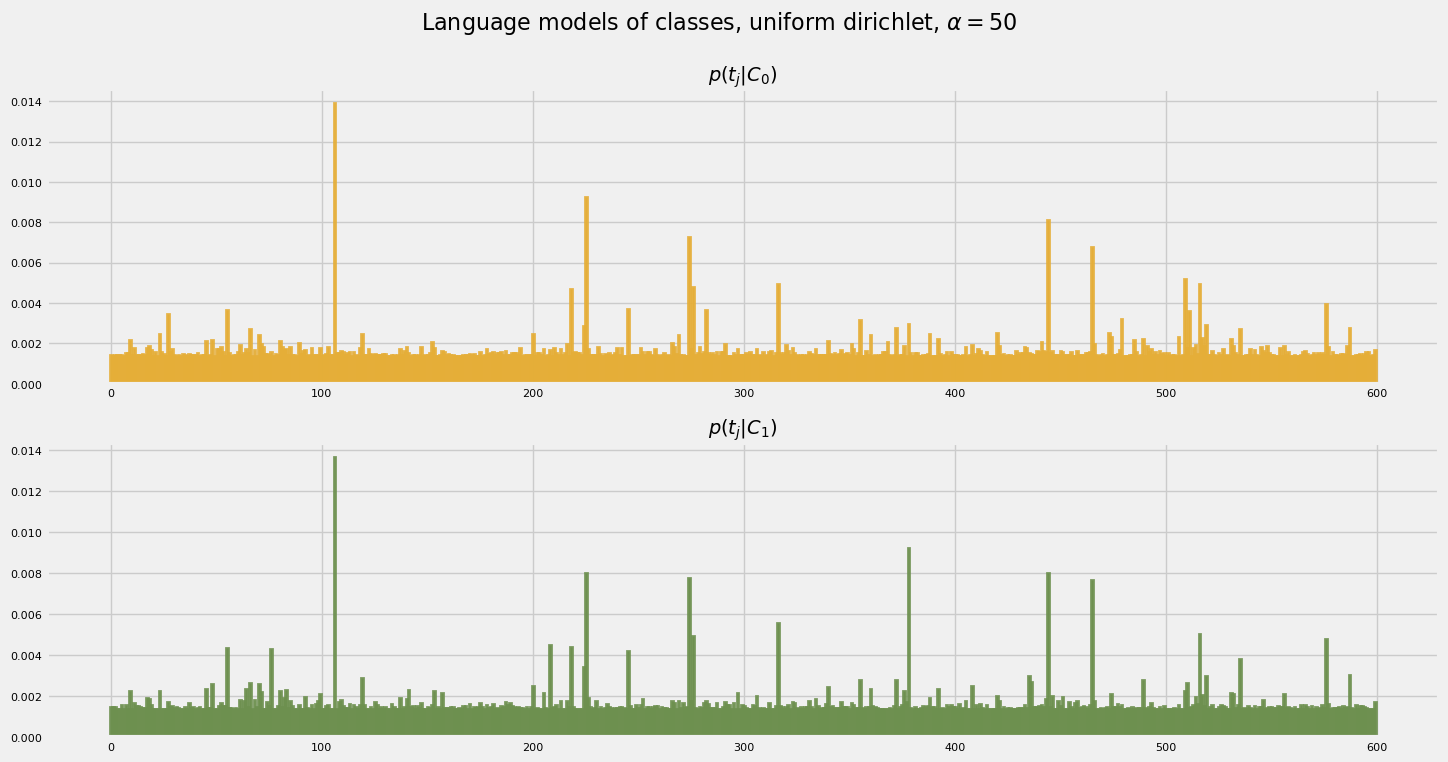

In [128]:
fig=plt.figure(figsize=(16,8))
for i,c in enumerate(classes):
    ax=plt.subplot(nclasses,1,i+1)
    ax.bar(range(clf1.feature_count_.shape[1]), pf1[i,:],  facecolor=colors[i+2], alpha=0.9, edgecolor=colors[i+2], lw=2)
    plt.title(f'$p(t_j|C_{i})$', fontsize=14)
plt.suptitle(r"Language models of classes, uniform dirichlet, $\alpha= {0:2d}$".format(α), fontsize=16)
plt.show()

Applicazione del classificatore al training set e derivazione della accuracy

In [129]:
preds1 = clf1.predict(xtrain)
print('Accuracy = {0:8.7f}'.format(accuracy_score(ytrain, preds1)))

Accuracy = 0.8722222


Definizione della funzione che calcola la mutua informazione di un termine $t$ rispetto alle classi

$$\sum_{C_0,C_1}\sum_{t=0,1} p(C,t)\log\frac{p(C,t)}{p(C)p(t)}=\sum_{C_0,C_1}\sum_{t=0,1} p(t|C)p(C)\log\frac{p(t|C)p(C)}{p(C)p(t)}$$

In [130]:
def mutual_information(term):
    s = 0
    for cl in [0,1]:
        s += likelihood[cl, term]*prior[cl]*np.log2(likelihood[cl, term]*prior[cl]/(prior[cl]*evidence[term]))
        s += (1-likelihood[cl, term])*prior[cl]*np.log2((1-likelihood[cl, term])*prior[cl]/(prior[cl]*(1-evidence[term])))
    return s

Calcolo del valore della mutua informazione per ogni termine

In [132]:
mi = np.array([mutual_information(f) for f in range(pf1.shape[1])])

In [37]:
mi[:20]

array([9.62563749e-05, 3.04573603e-04, 2.91429482e-05, 8.37291002e-05,
       2.53176066e-05, 2.63387759e-04, 7.61308530e-05, 5.83130360e-05,
       4.18746689e-04, 4.75424659e-06, 2.60609121e-07, 4.04920273e-05,
       1.00587796e-04, 1.48316789e-04, 6.79559175e-06, 1.76827334e-05,
       5.21301554e-07, 3.30490050e-05, 4.70374366e-06, 4.92447892e-05])

Ordinamento crescente delle feature rispetto alla mutua informazione

In [133]:
ordered_terms = np.flip(np.argsort(mi),0)

In [134]:
vocab[ordered_terms[:10]]

array(['windows', 'microsoft', 'motif', 'dos', 'window', 'sun', 'xterm',
       'code', 'server', 'win'], dtype='<U16')

Plot della mutua informazione dei termini

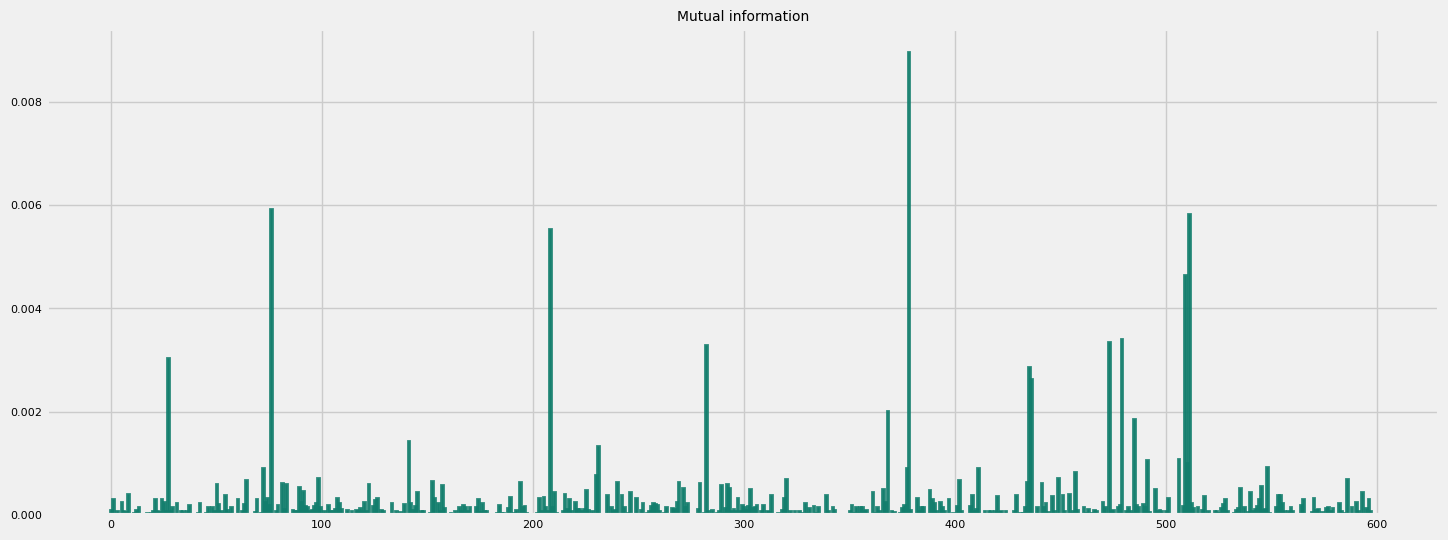

In [136]:
fig=plt.figure(figsize=(16,6))
plt.bar(range(clf1.feature_count_.shape[1]), mi,  facecolor=colors[6], alpha=0.9, edgecolor=colors[6], lw=2)
plt.title(r"Mutual information")
plt.show()

Seleziona i termini più informativi e riduci il training set considerando solo quelli

In [137]:
k = 15

Plot della mutua informazione delle feature selezionate

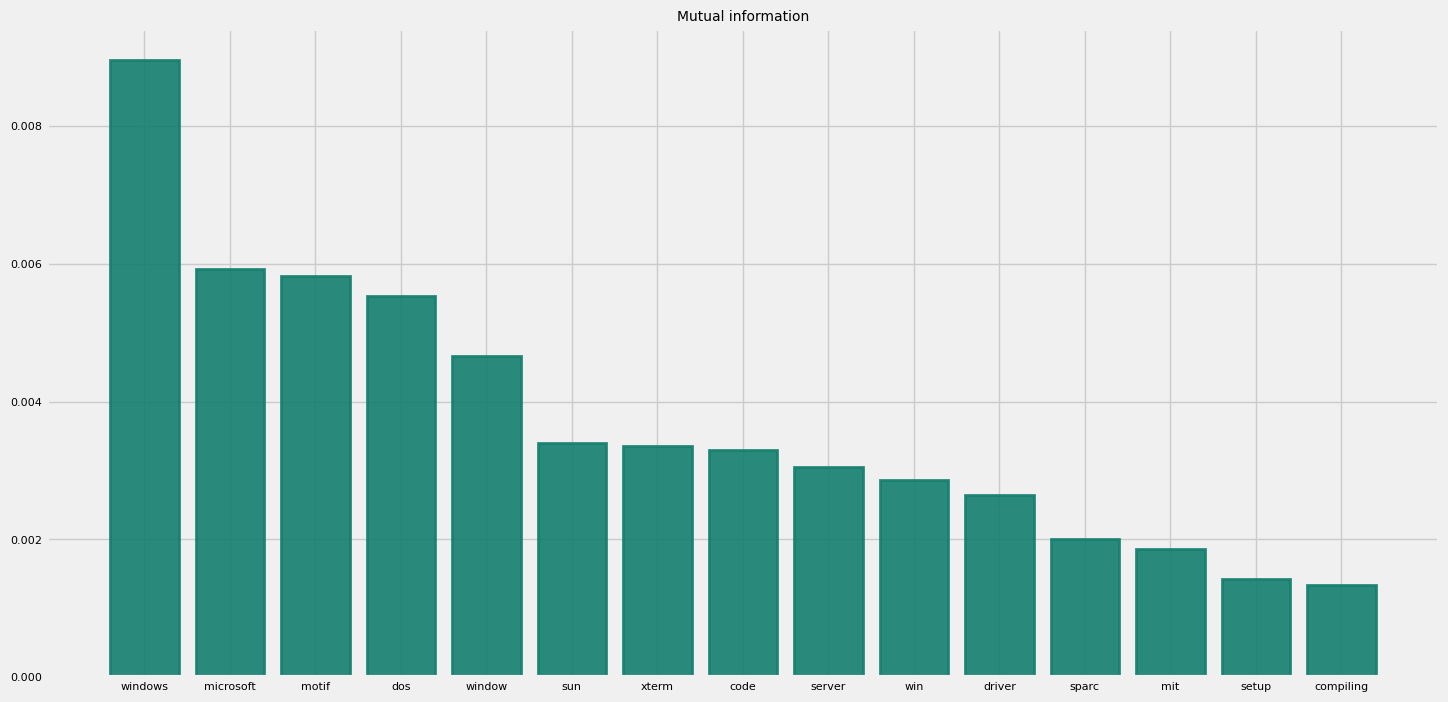

In [138]:
fig=plt.figure(figsize=(16,8))
plt.bar(range(k), mi[ordered_terms[:k]],  facecolor=colors[6], alpha=0.9, edgecolor=colors[6], lw=2)
plt.xticks(range(k), vocab[ordered_terms[:k]])
plt.title(r"Mutual information")
plt.show()

Crea un nuovo classificatore Naive Bayes ed effettua l'apprendimento sul training set ridotto 

In [139]:
x_red = xtrain[:,ordered_terms[:k]]
x_red.shape

(900, 15)

In [140]:
clf2 = MultinomialNB(alpha=1.0e-9)
clf2.fit(x_red, ytrain.ravel())

MultinomialNB(alpha=1e-09)

Applicazione del classificatore al training set ridotto e derivazione della accuracy

In [141]:
preds2 = clf2.predict(x_red)
print('Accuracy = {0:8.7f}'.format(accuracy_score(ytrain, preds2)))

Accuracy = 0.8777778
